In [31]:
#  File load
import pandas as pd

df = pd.read_csv('/Users/bg.lim/Downloads/TAMU_Agri/DK_Eating/0803_Raw_del_affect.csv')  # 파일 경로 지정

df

,StudyID,Timestamp,How_stressed,Weekday,Closest CGM Timestamp,Closest CGM Glucose,CGM_30min_mean,CGM_30min_sd,CGM_30min_max,CGM_30min_cv,...,CGM_60_GE_count,CGM_90min_mean,CGM_90min_sd,CGM_90min_max,CGM_90min_cv,CGM_90_GV,CGM_90_GE_count,GE_30min_occurred,GE_60min_occurred,GE_90min_occurred
0,1,2022-10-06 08:11:56,0.333333,3,2022-10-06 08:19:00,98,90.5,10.606602,98,11.720002,...,1,88.000000,5.253570,98,5.969966,Low,1,0,1,1
1,1,2022-10-06 13:37:27,0.333333,3,2022-10-06 13:34:00,90,91.0,7.071068,96,7.770404,...,0,99.500000,7.503333,106,7.541038,Low,0,0,0,0
2,1,2022-10-06 15:39:36,0.000000,3,2022-10-06 15:34:00,103,108.5,0.707107,109,0.651711,...,0,105.333333,2.658320,109,2.523722,Low,2,0,0,1
3,1,2022-10-06 16:28:38,0.000000,3,2022-10-06 16:34:00,104,104.5,0.707107,105,0.676657,...,1,104.166667,1.329160,106,1.275994,Low,1,0,1,1
4,1,2022-10-06 18:23:32,0.000000,3,2022-10-06 18:19:00,98,100.0,7.071068,105,7.071068,...,1,95.833333,5.382069,105,5.616072,Low,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3722,89,2023-05-08 18:58:36,0.333333,0,2023-05-08 18:53:00,109,112.0,1.414214,113,1.262691,...,1,128.666667,16.256281,149,12.634415,Low,2,0,1,1
3723,89,2023-05-09 09:09:45,0.000000,1,2023-05-09 09:08:00,100,98.0,0.000000,98,0.000000,...,1,110.333333,16.157558,132,14.644312,Low,2,0,1,1
3724,89,2023-05-09 11:22:51,0.333333,1,2023-05-09 11:23:00,95,93.5,2.121320,95,2.268792,...,1,98.666667,12.077527,123,12.240737,Low,1,0,1,1
3725,89,2023-05-09 15:28:26,0.000000,1,2023-05-09 15:23:00,96,83.5,7.778175,89,9.315179,...,0,85.500000,5.009990,92,5.859637,Low,1,0,0,1


In [33]:
# 
stress_distribution = df['How_stressed'].value_counts(normalize=True, dropna=True).sort_index() * 100

# 
import pandas as pd

stress_summary = pd.DataFrame({
    'Count': stress_counts,
    'Percentage': stress_distribution.round(2)
})

stress_summary


,Count,Percentage
How_stressed,,
0.000000,1921,51.61
0.333333,1264,33.96
0.666667,426,11.45
1.000000,111,2.98


# Average stressed level by participants

## Stress level: 0, 0.33:Slightly, 0.66:Moderately, 1: Extremely

In [44]:
# Group by StudyID and calculate the mean of How_stressed, ignoring missing values
avg_stress_by_participant = df.groupby('StudyID')['How_stressed'].mean().reset_index()

# Rename the column for clarity
avg_stress_by_participant.columns = ['StudyID', 'Avg_How_stressed']

# Display the result
avg_stress_by_participant

,StudyID,Avg_How_stressed
0,1,0.070175
1,2,0.062500
2,3,0.125000
3,7,0.177419
4,8,0.000000
...,...,...
69,84,0.131148
70,85,0.451613
71,86,0.000000
72,87,0.146667


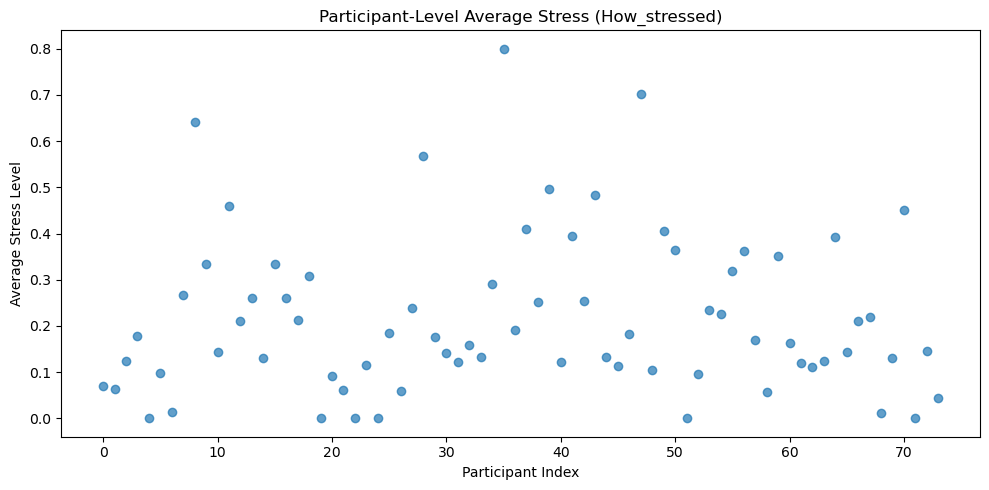

In [46]:
import matplotlib.pyplot as plt

# Create the scatter plot of average stress levels by participant
plt.figure(figsize=(10, 5))
plt.scatter(range(len(avg_stress_by_participant)), avg_stress_by_participant['Avg_How_stressed'], alpha=0.7)

# Set plot labels and title
plt.xlabel('Participant Index')  # Just an index, not actual StudyID
plt.ylabel('Average Stress Level')
plt.title('Participant-Level Average Stress (How_stressed)')

# Show the plot
plt.tight_layout()
plt.show()


## Stress level: 0, 0.33:Slightly, 0.66:Moderately, 1: Extremely

In [48]:
# Define function to label each participant's average stress level
def stress_group(avg_stress):
    if avg_stress == 0:
        return '0'
    elif 0 < avg_stress <= 0.33:
        return '0–0.33'
    elif 0.34 <= avg_stress <= 0.66:
        return '0.34–0.66'
    else:  # avg_stress >= 0.67
        return '≥0.67'

# Apply the function to create a new column
avg_stress_by_participant['Stress_Group'] = avg_stress_by_participant['Avg_How_stressed'].apply(stress_group)

# Count how many participants fall into each group
group_counts = avg_stress_by_participant['Stress_Group'].value_counts().sort_index()

# Display the result
print(group_counts)


Stress_Group
0             6
0.34–0.66    13
0–0.33       51
≥0.67         4
Name: count, dtype: int64


# Glucose level by Stress (4 Classes)

In [93]:
def stress_group(x):
    x = round(x, 2)
    if x == 0.00:
        return 'None'
    elif x <= 0.33:
        return 'Low'
    elif x <= 0.67:
        return 'Moderate'
    else:
        return 'High'

df['Stress_Level'] = df['How_stressed'].apply(stress_group)
# Group by 4-level stress category and summarize glucose stats
stress_order = ['None', 'Low', 'Moderate', 'High']
df['Stress_Level'] = pd.Categorical(df['Stress_Level'], categories=stress_order, ordered=True)

# Calculate mean, std, and count for each Stress_Level group
glucose_summary_4group = df.groupby('Stress_Level')['Closest CGM Glucose'].agg(['mean', 'std', 'count'])

# Display
print(glucose_summary_4group)


                    mean        std  count
Stress_Level                              
None           99.239459  21.337099   1921
Low            99.222310  20.836363   1264
Moderate      101.000000  21.551907    426
High          103.594828  24.222870    116


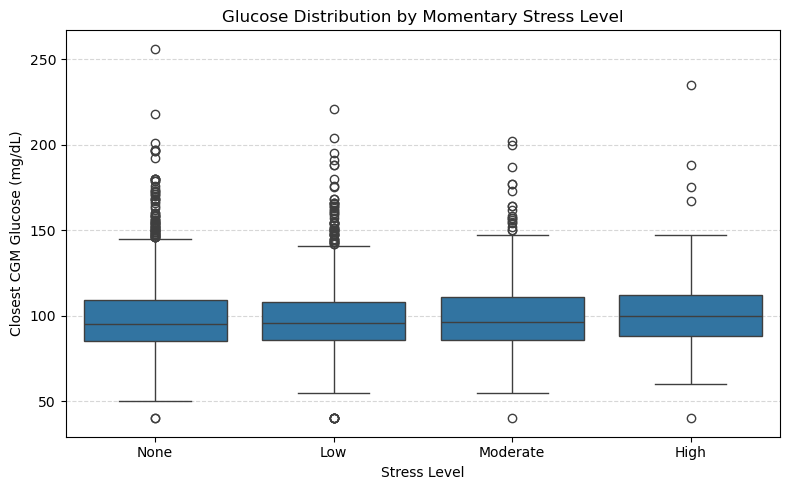

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set ordered category for correct axis order
stress_order = ['None', 'Low', 'Moderate', 'High']
df['Stress_Level'] = pd.Categorical(df['Stress_Level'], categories=stress_order, ordered=True)

# Create boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Stress_Level', y='Closest CGM Glucose', order=stress_order)

# Add plot details
plt.title('Glucose Distribution by Momentary Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Closest CGM Glucose (mg/dL)')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


# Glucose level by Stress (Binary)

In [97]:
# Create binary stress indicator: 0 = No stress, 1 = Any stress
df['Stress_Binary'] = (df['How_stressed'] != 0.0).astype(int)

# Group by binary stress and calculate mean CGM glucose
glucose_by_binary_stress = df.groupby('Stress_Binary')['Closest CGM Glucose'].mean()

# Optional: show standard deviation and count too
glucose_summary = df.groupby('Stress_Binary')['Closest CGM Glucose'].agg(['mean', 'std', 'count'])

print(glucose_summary)


                    mean        std  count
Stress_Binary                             
0              99.239459  21.337099   1921
1              99.922481  21.260776   1806


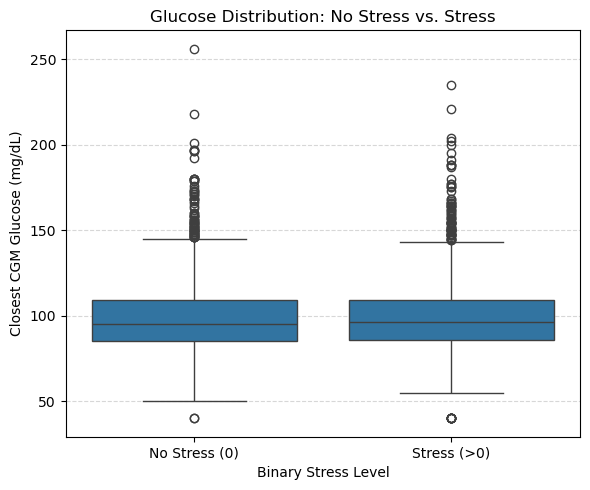

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create boxplot for binary stress
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x='Stress_Binary', y='Closest CGM Glucose')
plt.xticks([0, 1], ['No Stress (0)', 'Stress (>0)'])
plt.title('Glucose Distribution: No Stress vs. Stress')
plt.xlabel('Binary Stress Level')
plt.ylabel('Closest CGM Glucose (mg/dL)')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Glucose after 30min by stress

## 4 Classes

In [103]:
# Group by 4-level stress and summarize 30-min mean glucose
cgm_30min_summary_4group = df.groupby('Stress_Level')['CGM_30min_mean'].agg(['mean', 'std', 'count'])

# Display results
print(cgm_30min_summary_4group)


                    mean        std  count
Stress_Level                              
None           99.552317  21.469801   1921
Low            99.373418  20.607610   1264
Moderate      100.861502  19.849690    426
High          104.301724  24.250045    116


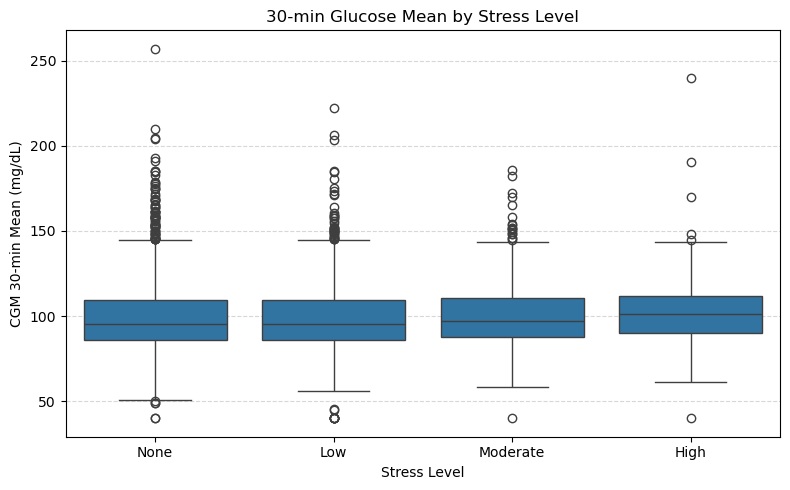

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for 30-min glucose mean by stress level
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Stress_Level', y='CGM_30min_mean', order=stress_order)

# Plot labels
plt.title('30-min Glucose Mean by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('CGM 30-min Mean (mg/dL)')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Binary

In [109]:
# Summarize CGM_30min_mean by binary stress (0 = No stress, 1 = Any stress)
cgm_30min_binary_summary = df.groupby('Stress_Binary')['CGM_30min_mean'].agg(['mean', 'std', 'count'])

# Display the result
print(cgm_30min_binary_summary)


                     mean        std  count
Stress_Binary                              
0               99.552317  21.469801   1921
1              100.040975  20.713057   1806


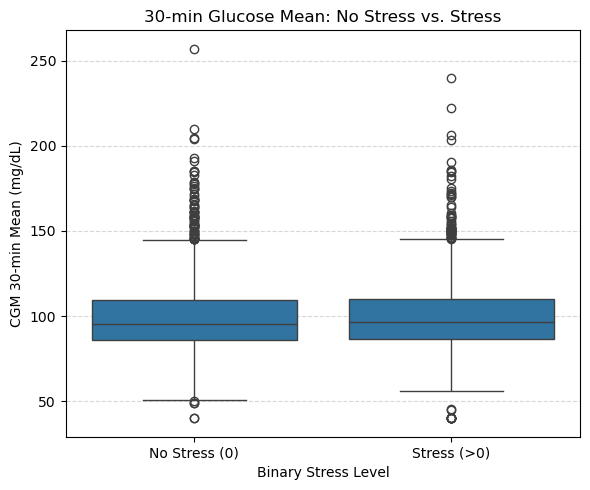

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for 30-min glucose mean by binary stress
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x='Stress_Binary', y='CGM_30min_mean')
plt.xticks([0, 1], ['No Stress (0)', 'Stress (>0)'])

# Add labels and grid
plt.title('30-min Glucose Mean: No Stress vs. Stress')
plt.xlabel('Binary Stress Level')
plt.ylabel('CGM 30-min Mean (mg/dL)')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Glucose trend after EMA (0-30-60-90min)

## Class 4

In [116]:
# Summary table by 4-level Stress_Level
stress_order = ['None', 'Low', 'Moderate', 'High']
df['Stress_Level'] = pd.Categorical(df['Stress_Level'], categories=stress_order, ordered=True)

# Aggregate each timepoint
summary_4group = df.groupby('Stress_Level')[[
    'Closest CGM Glucose', 'CGM_30min_mean', 'CGM_60min_mean', 'CGM_90min_mean'
]].mean()

summary_4group


,Closest CGM Glucose,CGM_30min_mean,CGM_60min_mean,CGM_90min_mean
Stress_Level,,,,
None,99.239459,99.552317,99.940352,100.251067
Low,99.222310,99.373418,99.533689,99.387711
Moderate,101.000000,100.861502,100.735915,100.606103
High,103.594828,104.301724,104.073276,103.930747


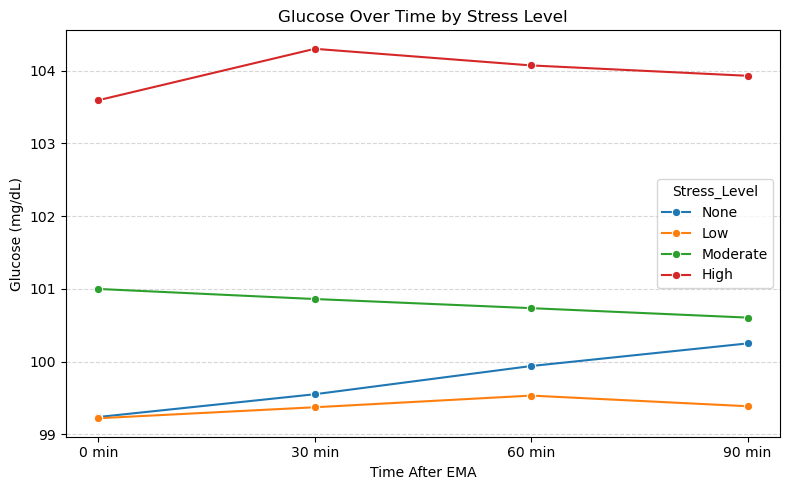

In [118]:
# Prepare data for lineplot
plot_data = summary_4group.reset_index().melt(id_vars='Stress_Level',
    value_vars=['Closest CGM Glucose', 'CGM_30min_mean', 'CGM_60min_mean', 'CGM_90min_mean'],
    var_name='Time', value_name='Glucose'
)

# Rename time labels for clarity
plot_data['Time'] = plot_data['Time'].replace({
    'Closest CGM Glucose': '0 min',
    'CGM_30min_mean': '30 min',
    'CGM_60min_mean': '60 min',
    'CGM_90min_mean': '90 min'
})

# Plot
plt.figure(figsize=(8, 5))
sns.lineplot(data=plot_data, x='Time', y='Glucose', hue='Stress_Level', marker='o')
plt.title('Glucose Over Time by Stress Level')
plt.ylabel('Glucose (mg/dL)')
plt.xlabel('Time After EMA')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Binary

In [122]:
summary_binary = df.groupby('Stress_Binary')[[
    'Closest CGM Glucose', 'CGM_30min_mean', 'CGM_60min_mean', 'CGM_90min_mean'
]].mean()

summary_binary


,Closest CGM Glucose,CGM_30min_mean,CGM_60min_mean,CGM_90min_mean
Stress_Binary,,,,
0,99.239459,99.552317,99.940352,100.251067
1,99.922481,100.040975,100.108850,99.966907


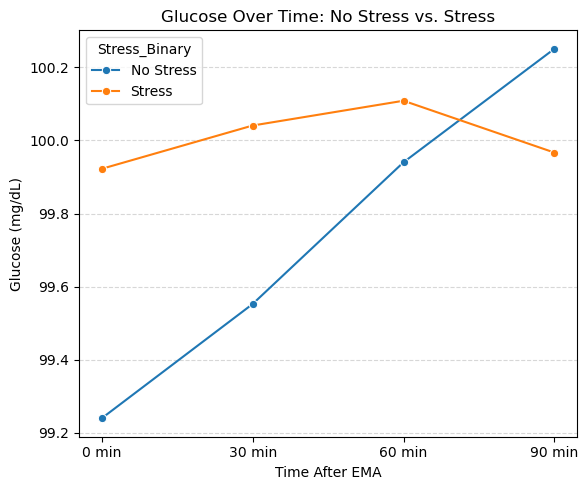

In [124]:
# Prepare data
plot_data_bin = summary_binary.reset_index().melt(id_vars='Stress_Binary',
    value_vars=['Closest CGM Glucose', 'CGM_30min_mean', 'CGM_60min_mean', 'CGM_90min_mean'],
    var_name='Time', value_name='Glucose'
)

# Label
plot_data_bin['Time'] = plot_data_bin['Time'].replace({
    'Closest CGM Glucose': '0 min',
    'CGM_30min_mean': '30 min',
    'CGM_60min_mean': '60 min',
    'CGM_90min_mean': '90 min'
})

# Binary label to text
plot_data_bin['Stress_Binary'] = plot_data_bin['Stress_Binary'].replace({0: 'No Stress', 1: 'Stress'})

# Plot
plt.figure(figsize=(6, 5))
sns.lineplot(data=plot_data_bin, x='Time', y='Glucose', hue='Stress_Binary', marker='o')
plt.title('Glucose Over Time: No Stress vs. Stress')
plt.ylabel('Glucose (mg/dL)')
plt.xlabel('Time After EMA')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
